In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

In [2]:
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_stock = pdr.DataReader('0005.HK', 'yahoo', start, end)

In [3]:
df_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,111.500000,107.500000,111.000000,108.000000,3908164.0,57.532219
2000-01-04,106.500000,105.000000,106.000000,106.000000,6895378.0,56.466812
2000-01-05,102.000000,99.500000,101.000000,100.500000,14657098.0,53.536945
2000-01-06,102.000000,96.250000,101.000000,97.000000,10632084.0,51.672459
2000-01-07,101.000000,97.500000,98.500000,100.500000,8368286.0,53.536945
...,...,...,...,...,...,...
2020-06-23,37.450001,36.099998,36.599998,37.450001,30842507.0,37.450001
2020-06-24,37.900002,37.000000,37.650002,37.000000,19690551.0,37.000000
2020-06-26,37.299999,36.700001,37.049999,36.700001,17355031.0,36.700001


In [4]:
stock_number = ['DJIA','^GSPC']
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_stock = pdr.DataReader(stock_number, 'yahoo', start, end)

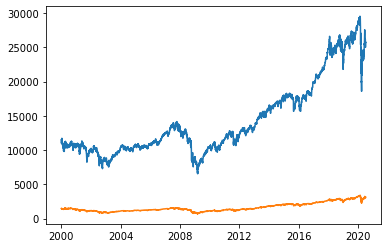

In [5]:
plt.plot(df_stock.Close.DJIA)
plt.plot(df_stock.Close['^GSPC'])

In [6]:
df_stock['Close']['DJIA'].rolling(5).mean()

Date
1999-12-31             NaN
2000-01-03             NaN
2000-01-04             NaN
2000-01-05             NaN
2000-01-06    11245.693945
                  ...     
2020-06-25    25848.812109
2020-06-26    25677.630078
2020-06-29    25591.798047
2020-06-30    25523.154297
2020-07-01    25580.960547
Name: DJIA, Length: 5158, dtype: float64

In [7]:
df_stock.Close[['DJIA']].tail()

Symbols,DJIA
Date,
2020-06-25,25745.599609
2020-06-26,25015.550781
2020-06-29,25595.800781
2020-06-30,25812.880859
2020-07-01,25734.970703


In [8]:
print(df_stock.Close.rolling(window=10).mean())

Symbols             DJIA        ^GSPC
Date                                 
1999-12-31           NaN          NaN
2000-01-03           NaN          NaN
2000-01-04           NaN          NaN
2000-01-05           NaN          NaN
2000-01-06           NaN          NaN
...                  ...          ...
2020-06-25  25910.244922  3094.245044
2020-06-26  25851.246094  3091.019043
2020-06-29  25834.510156  3089.684033
2020-06-30  25786.800195  3087.239038
2020-07-01  25748.336328  3087.476050

[5158 rows x 2 columns]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


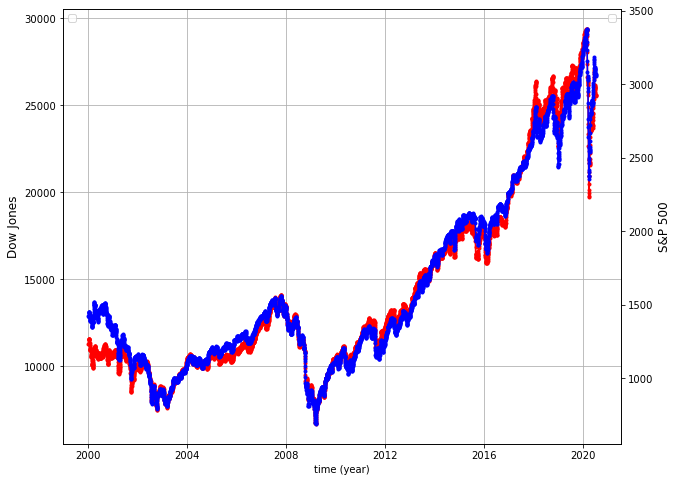

In [9]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.plot(df_stock.Close.DJIA.rolling(5).mean(),'.-r')
#ax1.plot(df_stock.Close.DJIA,'.g')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(df_stock.Close['^GSPC'].rolling(5).mean(),'.-b')
ax2.set_ylabel('S&P 500',fontsize=12)
ax2.legend(loc=1)
ax1.grid()
#fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [10]:
df_stock['Close']['^GSPC'].corr(df_stock.Close.DJIA)

0.9920316252356848

## 美匯指數

In [11]:
USD_number = ['DX-Y.NYB']
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_USD = pdr.DataReader(USD_number, 'yahoo', start, end)

In [12]:
df_USD.Close.head()

Symbols,DX-Y.NYB
Date,
1999-12-31,101.870003
2000-01-03,100.220001
2000-01-04,100.410004
2000-01-05,100.379997
2000-01-06,100.650002


No handles with labels found to put in legend.


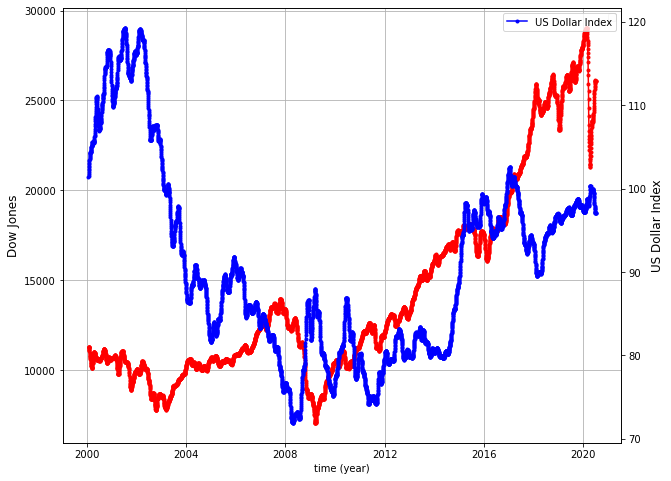

In [13]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.plot(df_stock.Close.DJIA.rolling(20).mean(),'.-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend(loc=0)
ax2 = ax1.twinx()
ax2.plot(df_USD.Close.rolling(20).mean(),'.-b')
ax2.set_ylabel('US Dollar Index',fontsize=12)
ax2.legend(['US Dollar Index'],loc=1)
ax1.grid()
#fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [14]:
DJvsUSD = pd.concat([df_stock.Close.DJIA, df_USD.Close], axis=1, sort=False).dropna()

In [15]:
DJvsUSD.head()

,DJIA,DX-Y.NYB
Date,,
1999-12-31,11497.120117,101.870003
2000-01-03,11357.509766,100.220001
2000-01-04,10997.929688,100.410004
2000-01-05,11122.650391,100.379997
2000-01-06,11253.259766,100.650002


In [16]:
DJvsUSD.DJIA.corr(DJvsUSD['DX-Y.NYB'])

0.10073891290206133

## 倫敦現貨黃金

In [17]:
gold = ['GOLDAMGBD228NLBM'] # the Gold Fixing Price 10:30 AM (London time) in London Bullion Market, in US Dollars
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_gold = pdr.DataReader(gold, 'fred', start, end) # Federal Reserve Economic Data (FRED) portal

In [18]:
df_gold.head()

,GOLDAMGBD228NLBM
DATE,
2000-01-03,NaN
2000-01-04,282.05
2000-01-05,282.10
2000-01-06,280.35
2000-01-07,282.00


In [19]:
df_gold.rolling(20).mean()

,GOLDAMGBD228NLBM
DATE,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
...,...
2020-06-25,1728.6375
2020-06-26,1730.4600
2020-06-29,1732.1600


No handles with labels found to put in legend.


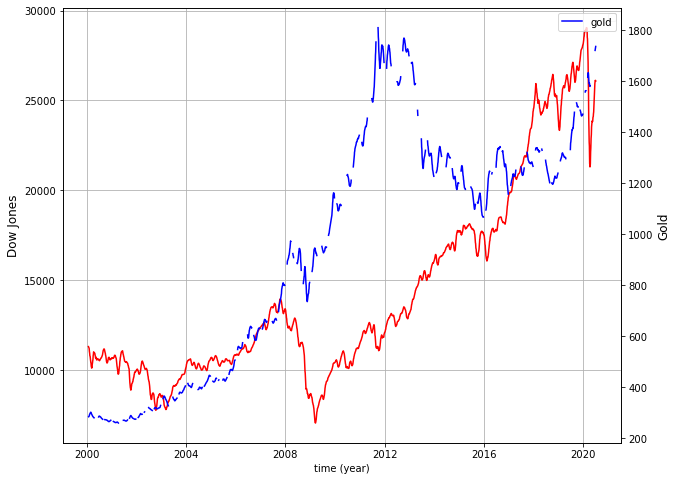

In [20]:
fig, ax1 = plt.subplots(figsize=(10,8))
curve1 = ax1.plot(df_stock.Close.DJIA.rolling(20).mean(),'-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend()
ax2 = ax1.twinx()
curve2 = ax2.plot(df_gold.rolling(20).mean(),'-b')
ax2.set_ylabel('Gold',fontsize=12)
ax2.legend(['gold'],loc=1)
ax1.grid()

In [21]:
DJvsGOLD = pd.concat([df_stock.Close.DJIA, df_gold], axis=1, sort=False).dropna()

In [22]:
DJvsGOLD.head()

,DJIA,GOLDAMGBD228NLBM
2000-01-04,10997.929688,282.05
2000-01-05,11122.650391,282.10
2000-01-06,11253.259766,280.35
2000-01-07,11522.559570,282.00
2000-01-10,11572.200195,281.70


In [23]:
DJvsGOLD.GOLDAMGBD228NLBM.corr(DJvsGOLD.DJIA)

0.5993094428279137

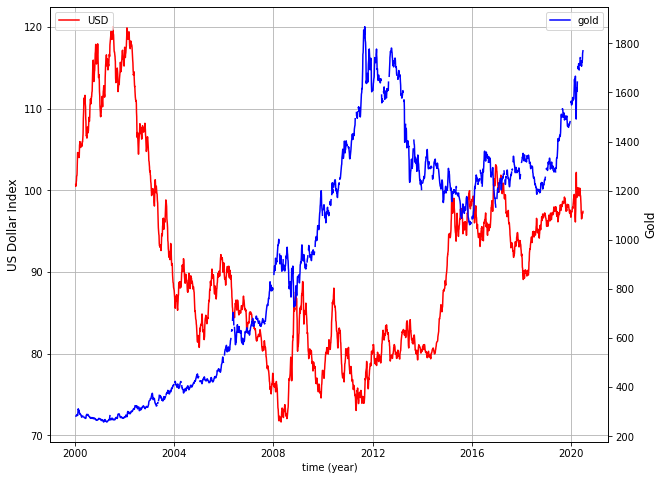

In [24]:
fig, ax1 = plt.subplots(figsize=(10,8))
curve1 = ax1.plot(df_USD.Close.rolling(5).mean(),'-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('US Dollar Index',fontsize=12)
ax1.legend(['USD'],loc=2)
ax2 = ax1.twinx()
curve2 = ax2.plot(df_gold.rolling(5).mean(),'-b')
ax2.set_ylabel('Gold',fontsize=12)
ax2.legend(['gold'],loc=1)
ax1.grid()

In [25]:
USDvsGOLD = pd.concat([df_USD.Close, df_gold], axis=1, sort=False).dropna()

In [26]:
USDvsGOLD.head()

,DX-Y.NYB,GOLDAMGBD228NLBM
2000-01-04,100.410004,282.05
2000-01-05,100.379997,282.10
2000-01-06,100.650002,280.35
2000-01-07,100.800003,282.00
2000-01-10,100.989998,281.70


In [27]:
USDvsGOLD.GOLDAMGBD228NLBM.corr(USDvsGOLD['DX-Y.NYB'])

-0.4699973446205019

# 美國十年期國債

In [28]:
#Tbond = ['DGS1MO'] #
Tbond = ['DGS10']
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_Tbond = pdr.DataReader(Tbond, 'fred', start, end) # Federal Reserve Economic Data (FRED) portal

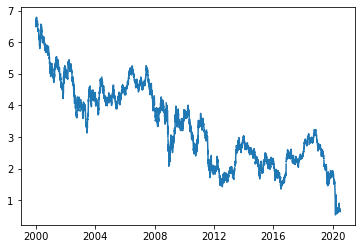

In [29]:
plt.plot(df_Tbond)

In [30]:
df_Tbond.head()

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52


No handles with labels found to put in legend.


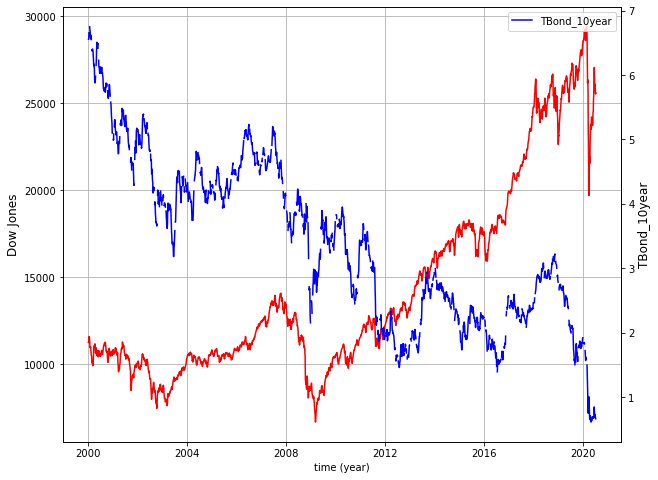

In [31]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.plot(df_stock.Close.DJIA.rolling(5).mean(),'-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(df_Tbond.rolling(5).mean(),'-b')
ax2.set_ylabel('TBond_10year',fontsize=12)
ax2.legend(['TBond_10year'],loc=1)
ax1.grid()

In [32]:
DJvsTBOND = pd.concat([df_stock.Close.DJIA, df_Tbond], axis=1, sort=False).dropna()

In [33]:
DJvsTBOND.head()

,DJIA,DGS10
2000-01-03,11357.509766,6.58
2000-01-04,10997.929688,6.49
2000-01-05,11122.650391,6.62
2000-01-06,11253.259766,6.57
2000-01-07,11522.559570,6.52


In [34]:
DJvsTBOND.DJIA.corr(DJvsTBOND.DGS10)

-0.6016925963986159

## [聯準會資產負債表](https://www.quandl.com/data/FRED/WALCL-All-Federal-Reserve-Banks-Total-Assets)

In [35]:
FED_asset = ['WALCL']
start = datetime.datetime(2000,1,1)
end   = datetime.datetime(2020,7,1)
df_FED_asset = pdr.DataReader(FED_asset, 'fred', start, end) # Federal Reserve Economic Data (FRED) portal

No handles with labels found to put in legend.


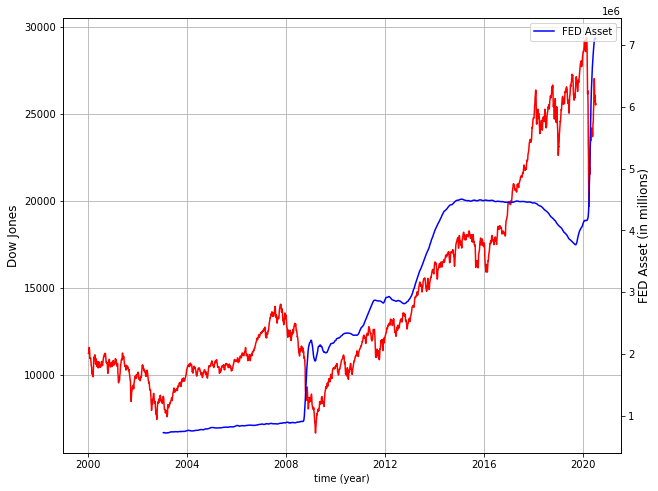

In [36]:
fig, ax1 = plt.subplots(figsize=(10,8))
curve1 = ax1.plot(df_stock.Close.DJIA.rolling(5).mean(),'-r')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('Dow Jones',fontsize=12)
ax1.legend()
ax2 = ax1.twinx()
curve2 = ax2.plot(df_FED_asset.rolling(5).mean(),'-b')
ax2.set_ylabel('FED Asset (in millions)',fontsize=12)
ax2.legend(['FED Asset'],loc=1)
ax1.grid()

In [37]:
DJvsFED = pd.concat([df_stock.Close.DJIA, df_FED_asset], axis=1, sort=False).dropna()

In [38]:
DJvsTBOND.DJIA.corr(DJvsFED.WALCL)

0.777794449247773

In [39]:
pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id=WALCL')

,DATE,WALCL
0,2002-12-18,719542.0
1,2002-12-25,732059.0
2,2003-01-01,730994.0
3,2003-01-08,723762.0
4,2003-01-15,720074.0
...,...,...
917,2020-07-15,6958604.0
918,2020-07-22,6964755.0
919,2020-07-29,6949032.0
920,2020-08-05,6945237.0


In [40]:
Price = pd.concat([df_stock.Close.DJIA, df_stock.Close['^GSPC'], df_USD.Close, df_gold, df_Tbond, df_FED_asset], axis=1, sort=False).dropna()

In [41]:
Price.head()

,DJIA,^GSPC,DX-Y.NYB,GOLDAMGBD228NLBM,DGS10,WALCL
2002-12-18,8447.349609,891.119995,103.629997,337.05,4.06,719542.0
2003-01-08,8595.309570,909.929993,101.870003,346.75,4.00,723762.0
2003-01-15,8723.179688,918.219971,101.339996,351.90,4.10,720074.0
2003-01-22,8318.730469,878.359985,100.230003,359.25,3.95,735953.0
2003-01-29,8110.709961,864.359985,99.279999,369.85,4.06,712809.0


In [42]:
Price.columns=['Dow Jones','S&P 500', 'US Dollar Index','Gold', 'Treasury Bond Yield-10-Year', 'Fed Total Asset']

In [43]:
import seaborn as sns

<AxesSubplot:>

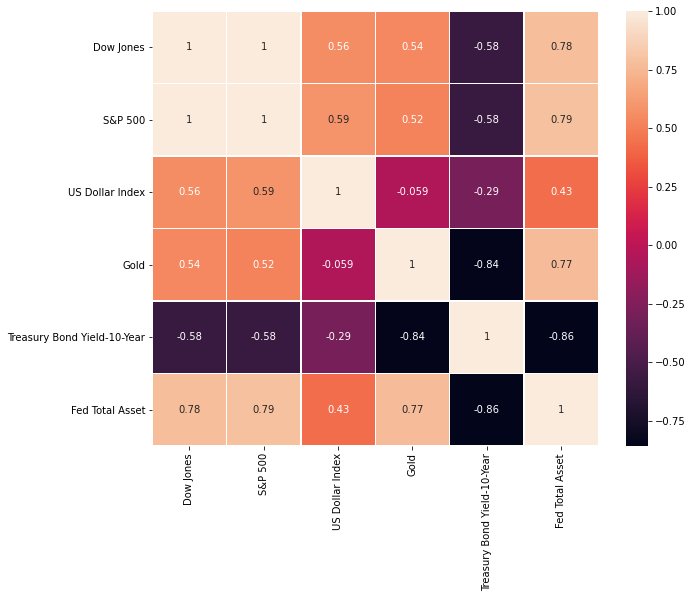

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(Price.corr(),annot=True, linewidths=.5)

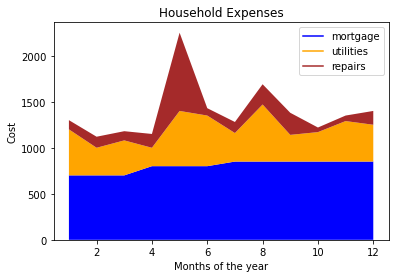

In [45]:
import matplotlib.pyplot as plt

months= [x for x in range(1,13)]

mortgage= [700, 700, 700,
           800, 800, 800,
           850, 850, 850,
           850, 850, 850]

utilities= [500, 300, 380,
           200, 600, 550,
           310, 620, 290,
           320, 440, 400]

repairs= [100, 120, 100,
          150, 850, 80,
          120, 220, 240,
          50, 60, 150]

plt.plot([],[], color='blue', label='mortgage')
plt.plot([],[], color='orange', label='utilities')
plt.plot([],[], color='brown', label='repairs')


plt.stackplot(months, mortgage, utilities, repairs, colors=['blue', 'orange', 'brown'])

plt.legend()

plt.title('Household Expenses')
plt.xlabel('Months of the year')
plt.ylabel('Cost')

plt.show()